In [2]:
import pickle
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [3]:
with open('depots/gas_stations.pickle', 'rb') as f:
    gas_stations = pickle.load(f)

# Load graph once
with open("processed_data/bkk_augmented_graph.pickle", "rb") as f:
    G = pickle.load(f)

In [4]:
nodes, _ = ox.graph_to_gdfs(G)
hospital_nodes = nodes[nodes["vtype"] == "hosp"].index
depot_nodes = list(gas_stations) + list(hospital_nodes)
accident_nodes = list(nodes[nodes["vtype"] == "accident"].index)

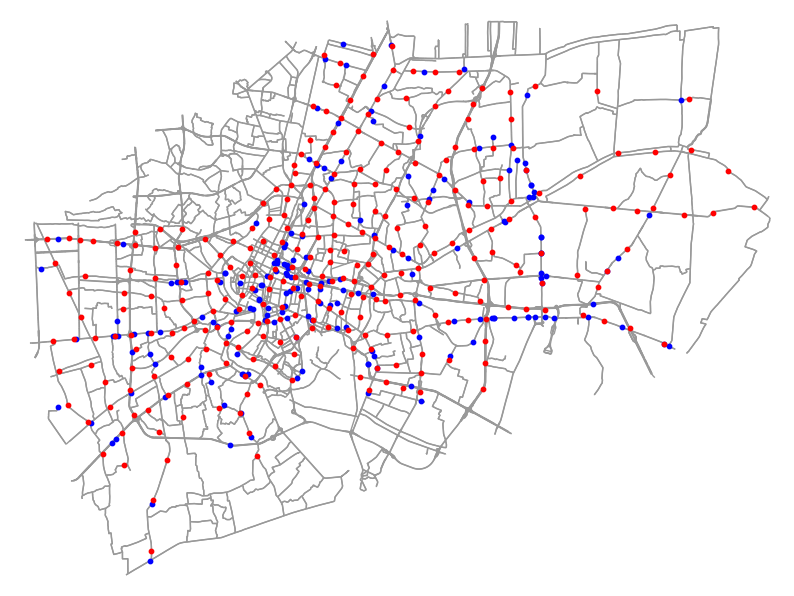

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [5]:
ax = nodes.loc[depot_nodes].plot(marker="o", color="blue", markersize=10, zorder=5, figsize=(10, 10))
ax = nodes.loc[accident_nodes].plot(marker="o", ax=ax, color="red", markersize=10, zorder=5)
ox.plot_graph(G, ax=ax, node_size=0)

In [6]:
with open('results/model_1_raw_train.pickle', 'rb') as f:
    result1s = pickle.load(f)
with open('results/model_2_raw_train.pickle', 'rb') as f:
    result2s = pickle.load(f)
with open('results/model_3_raw_train.pickle', 'rb') as f:
    result3s = pickle.load(f)

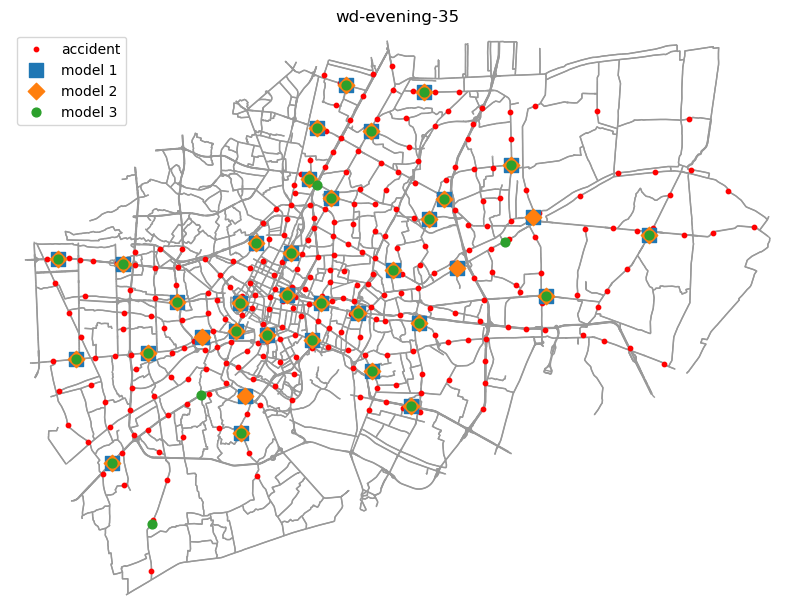

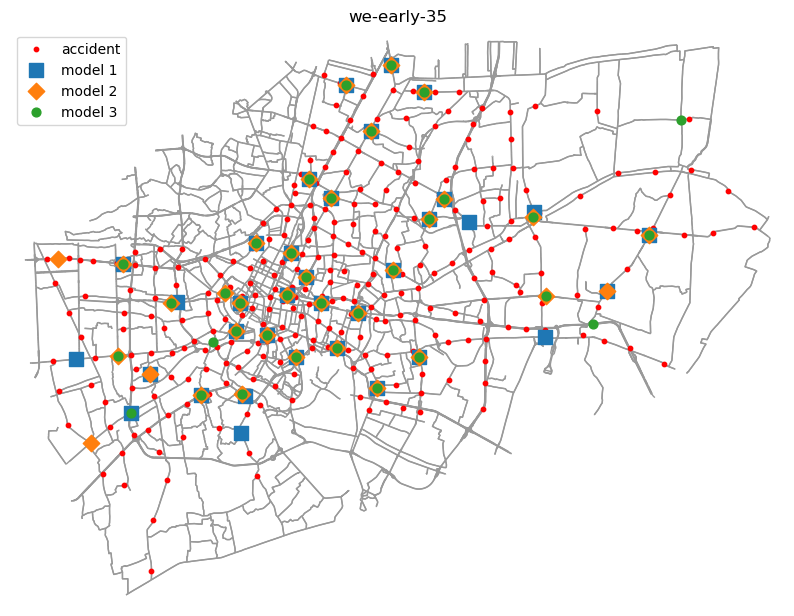

In [15]:
for day, time in [["wd", "evening"], ["we", "early"]]:
    for num_depot in range(35, 35+1):
        fig, ax = plt.subplots(figsize=(10, 10))
        ax = nodes.loc[accident_nodes].plot(marker="o", ax=ax, color="red", markersize=10, zorder=3)
        for idx, results in enumerate([result1s, result2s, result3s]):
            result = results[day][time][num_depot]
            X_opt = result['X']
            y_opt = result['y']

            selected_depot_nodes = [depot_nodes[i] for i, y in enumerate(y_opt) if y == 1]
            if idx == 0:
                ax = nodes.loc[selected_depot_nodes].plot(marker="s", ax=ax, markersize=100, zorder=5)
            if idx == 1:
                ax = nodes.loc[selected_depot_nodes].plot(marker="D", ax=ax, markersize=70, zorder=5)
            if idx == 2:
                ax = nodes.loc[selected_depot_nodes].plot(marker="o", ax=ax, markersize=40, zorder=5)
        ax.legend(["accident", "model 1", "model 2", "model 3"])
        ax.set_title(f"{day}-{time}-{num_depot}")
        ox.plot_graph(G, ax=ax, node_size=0)
        fig.savefig(f"{day}-{time}-{num_depot}.png", dpi=300)
            

In [29]:
print(len(depot_nodes))

189
